In [3]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as k

2022-12-11 00:48:38.353709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 00:48:38.453382: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-11 00:48:38.455965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/galactic/opt/yaml_cpp_vendor/lib:/opt/ros/galactic/opt/rviz_ogre_vendor/li

In [4]:
(xtrain, ytrain), (xtest, ytest) = k.datasets.cifar10.load_data()

In [5]:
print(f"xtrain: {xtrain.shape}")
print(f"ytrain: {ytrain.shape}")
print(f"xtest: {xtest.shape}")
print(f"ytest: {ytest.shape}")

xtrain: (50000, 32, 32, 3)
ytrain: (50000, 1)
xtest: (10000, 32, 32, 3)
ytest: (10000, 1)


In [6]:
xtrain = tf.convert_to_tensor(xtrain/255., dtype=tf.float32)
xtest = tf.convert_to_tensor(xtest/255., dtype=tf.float32)
ytrain = k.utils.to_categorical(ytrain)
ytest = k.utils.to_categorical(ytest)

2022-12-11 00:48:40.316888: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/galactic/opt/yaml_cpp_vendor/lib:/opt/ros/galactic/opt/rviz_ogre_vendor/lib:/opt/ros/galactic/lib/x86_64-linux-gnu:/opt/ros/galactic/lib
2022-12-11 00:48:40.316909: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-11 00:48:40.316926: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (server1.example.com): /proc/driver/nvidia/version does not exist
2022-12-11 00:48:40.317237: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  A

In [18]:
class Model(k.Model):
  def __init__(self):
    super(Model, self).__init__()
    self.conv0 = k.layers.Conv2D(filters=32, kernel_size=3, activation="relu")
    self.maxp0 = k.layers.MaxPooling2D()
    self.bn0 = k.layers.BatchNormalization()
    self.conv1 = k.layers.Conv2D(filters=64, kernel_size=3, activation="relu")
    self.maxp1 = k.layers.MaxPooling2D()
    self.bn1 = k.layers.BatchNormalization()
    self.conv2 = k.layers.Conv2D(filters=128, kernel_size=3, activation="relu")
    self.maxp2 = k.layers.MaxPooling2D()
    self.bn2 = k.layers.BatchNormalization()
    self.globalp = k.layers.GlobalAveragePooling2D()
#     self.flatten = k.layers.Flatten()
    self.dropout = k.layers.Dropout(rate=0.5)
    self.dense3 = k.layers.Dense(units=512, activation="relu")
    self.dense0 = k.layers.Dense(units=256, activation="relu")
    self.dense1 = k.layers.Dense(units=64, activation="relu")
    self.dense2 = k.layers.Dense(units=10, activation="softmax")

  def call(self, inputs=k.Input(shape=(32, 32, 3)), training=False):
    output = self.conv0(inputs)
    output = self.maxp0(output)
    output = self.bn0(output)
    output = self.conv1(output)
    output = self.maxp1(output)
    output = self.bn1(output)
    output = self.conv2(output)
    output = self.maxp2(output)
    output = self.bn2(output)
    output = self.globalp(output)
#     output = self.flatten(output)
    output = self.dropout(output, training)
    output = self.dense3(output)
    output = self.dense0(output)
    output = self.dense1(output)
    output = self.dense2(output)
    return output

In [19]:
mdl = Model()
mdl.compile(optimizer="Adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])

In [21]:
history = mdl.fit(xtrain,
                  ytrain,
                  epochs=100,
                  callbacks=[k.callbacks.EarlyStopping(monitor="val_loss",
                                                       patience=5,
                                                       restore_best_weights=True),
                             k.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                           patience=3)],
                  validation_split=0.1, batch_size=32, shuffle=True, steps_per_epoch=1000)

Epoch 1/100
1000/1000 [==============================] - 9s 8ms/step - loss: 1.5813 - accuracy: 0.4159 - val_loss: 1.5172 - val_accuracy: 0.4428 - lr: 0.0010
Epoch 2/100
1000/1000 [==============================] - 8s 8ms/step - loss: 1.2794 - accuracy: 0.5421 - val_loss: 1.5187 - val_accuracy: 0.4770 - lr: 0.0010
Epoch 3/100
1000/1000 [==============================] - 8s 8ms/step - loss: 1.1706 - accuracy: 0.5826 - val_loss: 1.2382 - val_accuracy: 0.5682 - lr: 0.0010
Epoch 4/100
1000/1000 [==============================] - 9s 9ms/step - loss: 1.0872 - accuracy: 0.6164 - val_loss: 1.0799 - val_accuracy: 0.6110 - lr: 0.0010
Epoch 5/100
1000/1000 [==============================] - 10s 10ms/step - loss: 1.0195 - accuracy: 0.6406 - val_loss: 1.0598 - val_accuracy: 0.6262 - lr: 0.0010
Epoch 6/100
1000/1000 [==============================] - 12s 12ms/step - loss: 0.9850 - accuracy: 0.6519 - val_loss: 0.9460 - val_accuracy: 0.6672 - lr: 0.0010
Epoch 7/100
1000/1000 [=========================

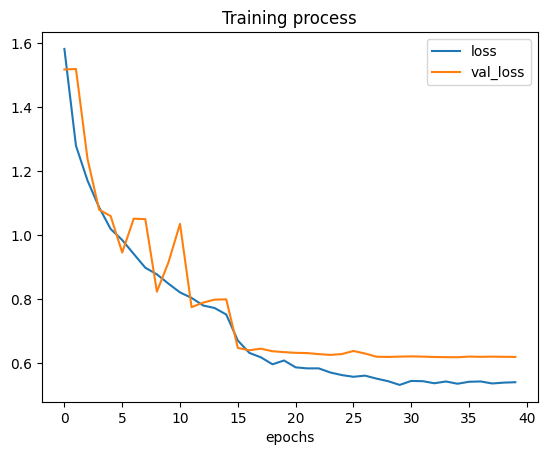

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.xlabel("epochs")
plt.title("Training process")
plt.show()

In [23]:
results = mdl.evaluate(xtest, ytest, verbose=0)
print(f"Test accuracy: {results[1]*100}")
print(f"Test loss: {results[0]}")

Test accuracy: 78.22999954223633
Test loss: 0.6478199362754822
